In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [359]:
data = pd.read_csv('data/output/final_ma_data_clean.csv', encoding='latin-1')


In [50]:
# show all columns 
pd.set_option('display.max_columns', None)
data['partd'].value_counts()

Yes    107207
No     33071 
Name: partd, dtype: int64

In [21]:
data['plan_type'].unique()

array(['Local PPO', 'HMO/HMOPOS', 'PFFS', '1876 Cost',
       'PSO (State License)', 'Regional PPO', 'MSA'], dtype=object)

In [22]:
# show column that contain string enrollment
enrollment = data.columns[data.columns.str.contains('enrollment')]
data[data['year']==2009]['avg_eligibles'].mean()

39345.92508953966

(array([1295., 3327., 6586., 3698., 2210., 1444.,  426.]),
 array([1.5       , 1.92857143, 2.35714286, 2.78571429, 3.21428571,
        3.64285714, 4.07142857, 4.5       ]),
 <BarContainer object of 7 artists>)

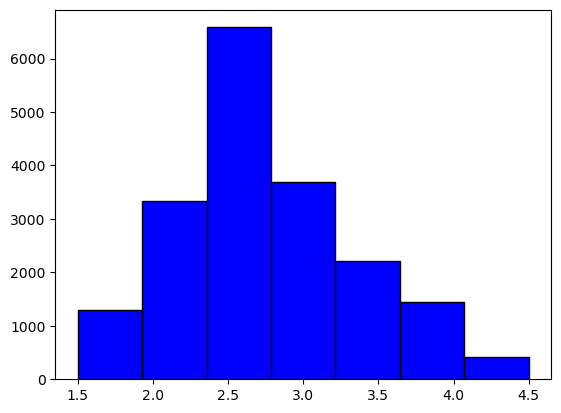

In [23]:
# plot a histogram of the star rating
plt.hist(data[(data['year']==2009)&(~data['avg_enrollment'].isna())&(~data['partc_score'].isna())]['Star_Rating'], bins=7, color='blue', edgecolor='black')

In [31]:
data['year']

0         2009
1         2009
2         2009
3         2009
4         2009
          ... 
140273    2015
140274    2015
140275    2015
140276    2015
140277    2015
Name: year, Length: 140278, dtype: int64

In [361]:
data1 = data[(data['year']!=2009)&(~data['avg_enrollment'].isna())&(~data['partc_score'].isna())]

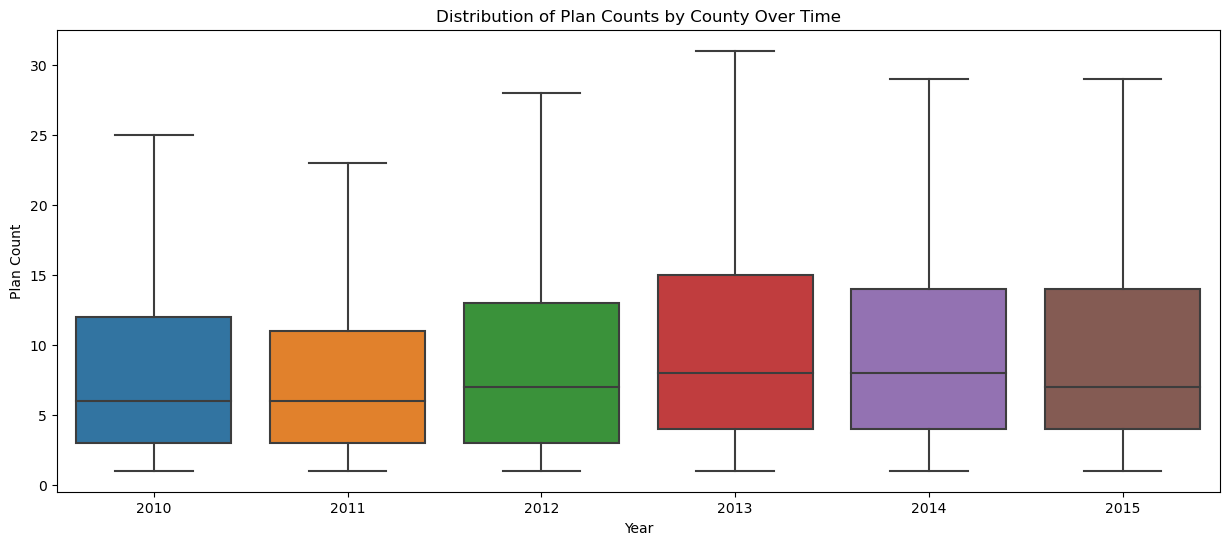

In [332]:
# Provide a box and whisker plot showing the distribution of plan counts by county over time
plan_count_county = data1.groupby(['year', 'county']).agg({'planid': 'count'}).reset_index()
plt.figure(figsize=(15, 6))
# boxplot with log scale
sns.boxplot(x='year', y='planid', data=plan_count_county, showfliers=False)
plt.title('Distribution of Plan Counts by County Over Time')
plt.ylabel('Plan Count')
plt.xlabel('Year')
q1_fig = plt.gcf()
plt.show()


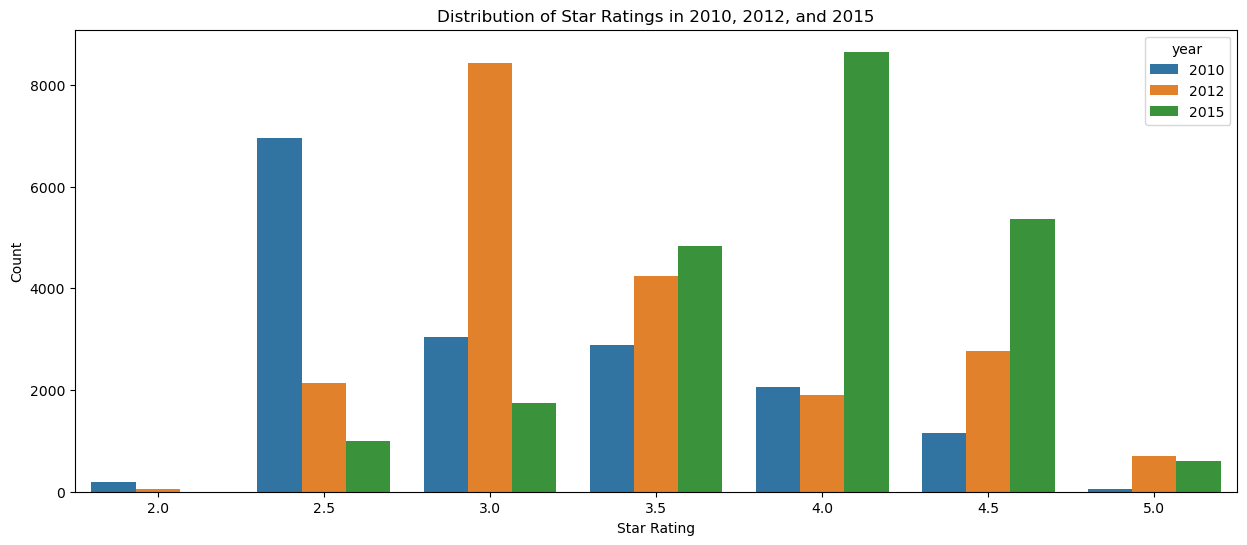

In [333]:
# Provide bar graphs showing the distribution of star ratings in 2010, 2012, and 2015.
star_rating = data1[data1['year'].isin([2010, 2012, 2015])]
plt.figure(figsize=(15, 6))
sns.countplot(x='Star_Rating', hue='year', data=star_rating)
plt.title('Distribution of Star Ratings in 2010, 2012, and 2015')
plt.ylabel('Count')
plt.xlabel('Star Rating')
q2_fig = plt.gcf()
plt.show()

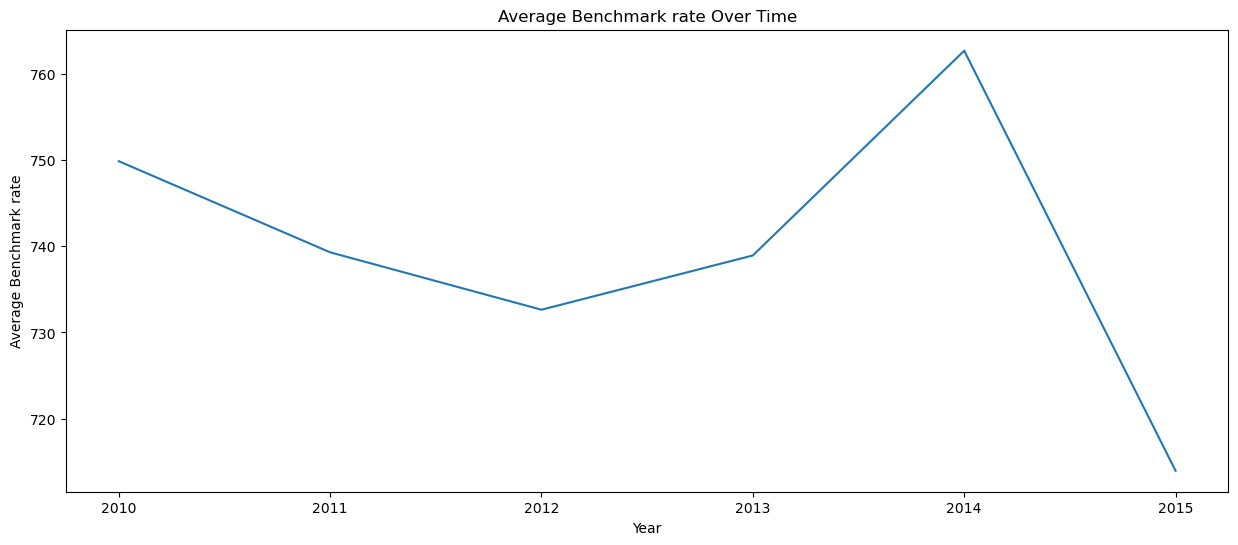

In [363]:
# Plot the average benchmark payment over time from 2010 through 2015
plt.figure(figsize=(15, 6))
rebate_year = data1.groupby('year').agg({'payment_partc': 'mean'}).reset_index()
sns.lineplot(x='year', y='payment_partc', data=rebate_year)
plt.title('Average Benchmark rate Over Time')
plt.ylabel('Average Benchmark rate')
plt.xlabel('Year')
q3_rate_fig = plt.gcf()
plt.show()


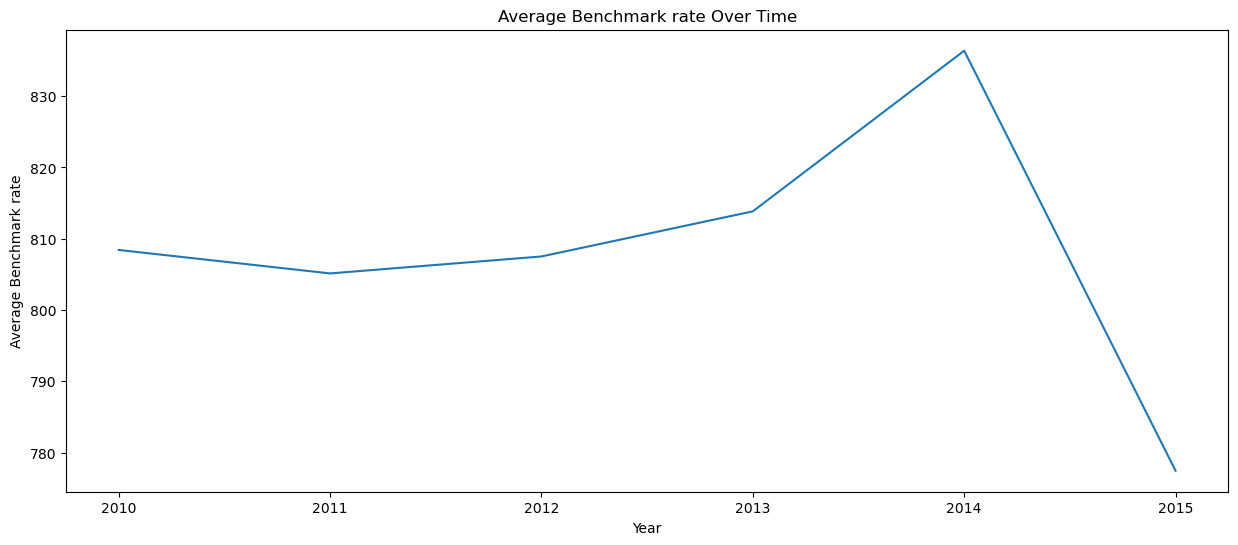

In [364]:
plt.figure(figsize=(15, 6))
rebate_year = data1.groupby('year').agg({'ma_rate': 'mean'}).reset_index()
sns.lineplot(x='year', y='ma_rate', data=rebate_year)
plt.title('Average Benchmark rate Over Time')
plt.ylabel('Average Benchmark rate')
plt.xlabel('Year')
q3_rate_fig = plt.gcf()
plt.show()

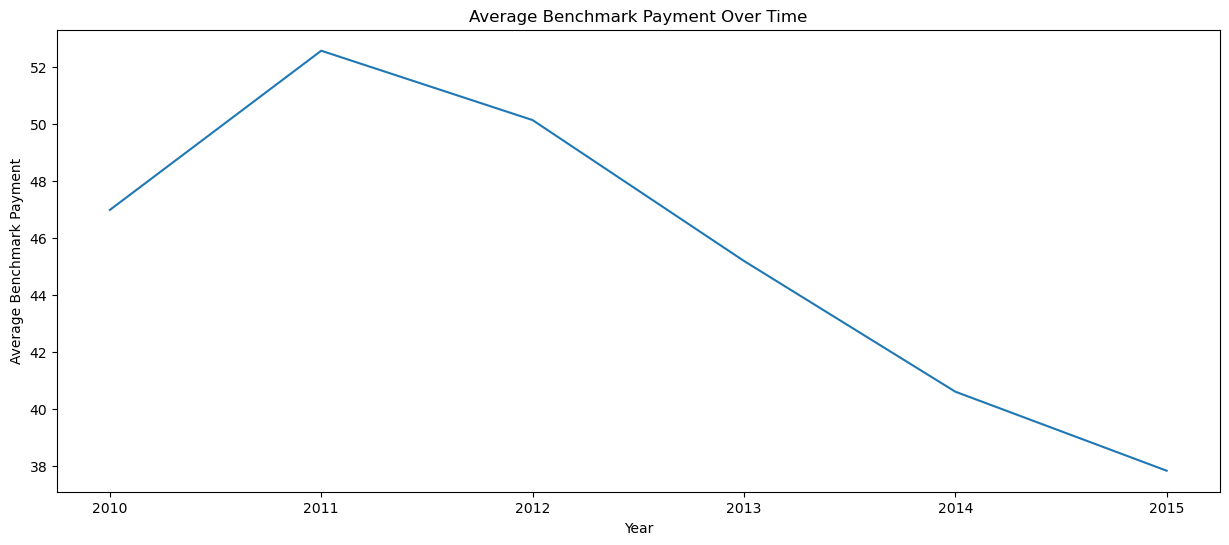

In [335]:
# Plot the average benchmark payment over time from 2010 through 2015
plt.figure(figsize=(15, 6))
rebate_year = data1.groupby('year').agg({'rebate_partc': 'mean'}).reset_index()
sns.lineplot(x='year', y='rebate_partc', data=rebate_year)
plt.title('Average Benchmark Payment Over Time')
plt.ylabel('Average Benchmark Payment')
plt.xlabel('Year')
q3_payment_fig = plt.gcf()
plt.show()


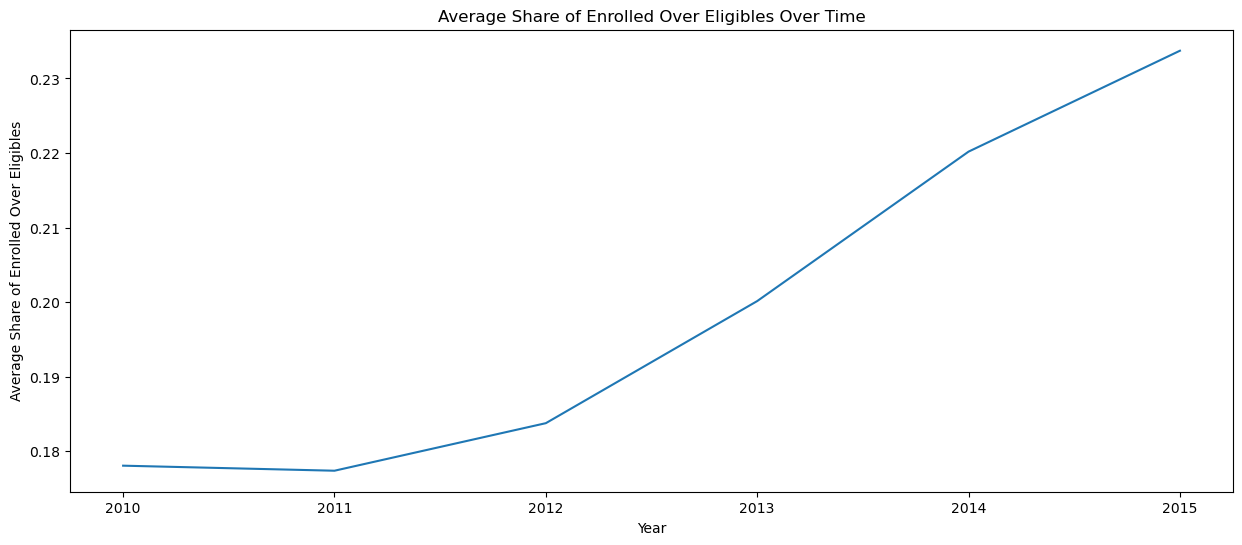

In [79]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrolled': 'mean', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrolled']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrolled Over Eligibles Over Time')
plt.ylabel('Average Share of Enrolled Over Eligibles')
plt.xlabel('Year')
plt.show()


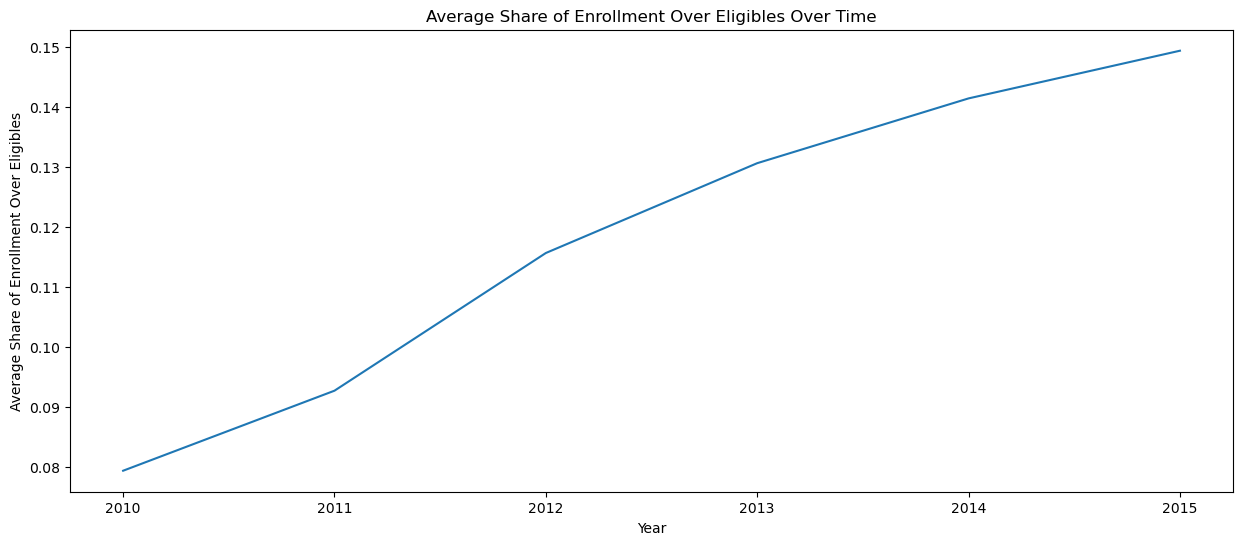

In [81]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrollment': 'sum', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrollment']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrollment Over Eligibles Over Time')
plt.ylabel('Average Share of Enrollment Over Eligibles')
plt.xlabel('Year')
plt.show()


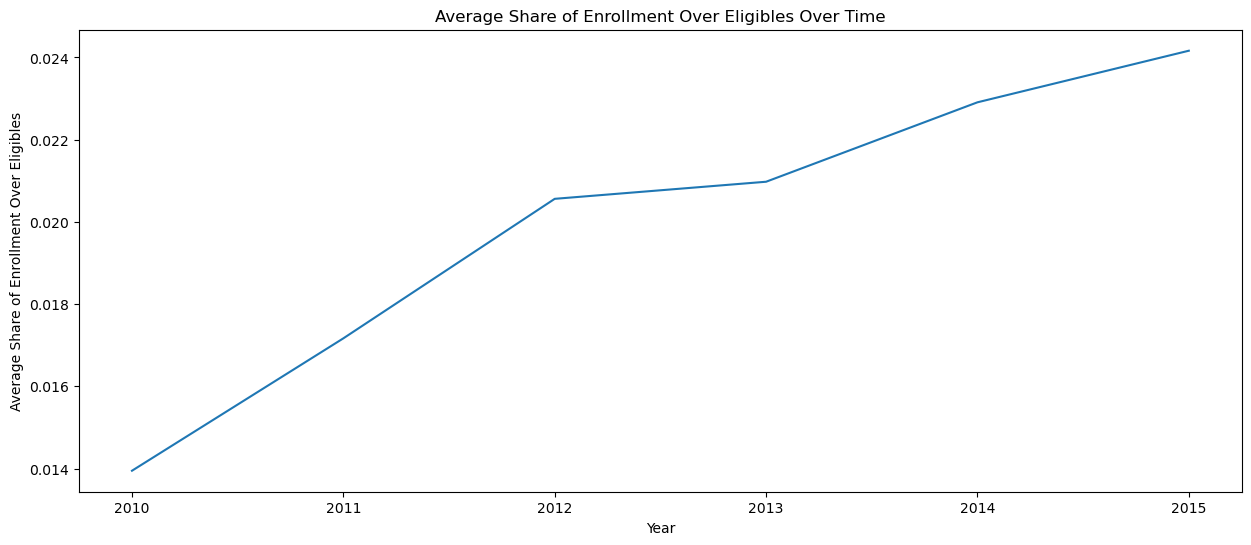

In [336]:
avg_share = data1.groupby(['year','county', 'fips','state']).agg({'avg_enrollment': 'mean', 'avg_eligibles': 'mean'}).reset_index()
avg_share['avg_share'] = avg_share['avg_enrollment']/avg_share['avg_eligibles']
avg_share = avg_share.groupby('year').agg({'avg_share': 'mean'}).reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(x='year', y='avg_share', data=avg_share)
plt.title('Average Share of Enrollment Over Eligibles Over Time')
plt.ylabel('Average Share of Enrollment Over Eligibles')
plt.xlabel('Year')
q4_fig = plt.gcf()
plt.show()


In [82]:
rd = data1[data1['year']==2010]

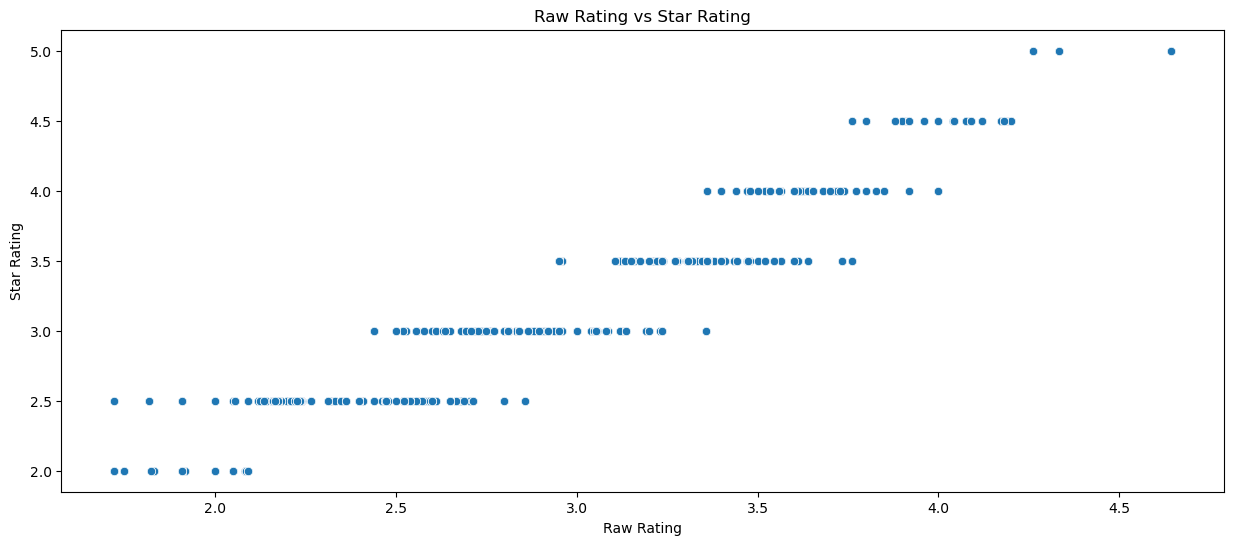

In [337]:
# plot raw rating against star rating
plt.figure(figsize=(15, 6))
sns.scatterplot(x='raw_rating', y='Star_Rating', data=rd)
plt.title('Raw Rating vs Star Rating')
plt.ylabel('Star Rating')
plt.xlabel('Raw Rating')
q5_fig = plt.gcf()    
plt.show()



In [125]:
rd['Star_Rating'].value_counts()

2.5    6962
3.0    3034
3.5    2879
4.0    2050
4.5    1164
2.0    198 
5.0    50  
Name: Star_Rating, dtype: int64

In [126]:
three_star = rd[(rd['raw_rating']<3)&(rd['Star_Rating']==3)]['Star_Rating'].count()
three_star

2117

In [127]:
threefive_star = rd[(rd['raw_rating']<3.5)&(rd['Star_Rating']==3.5)]['Star_Rating'].count()
threefive_star

2394

In [128]:
four_star = rd[(rd['raw_rating']<4)&(rd['Star_Rating']==4)]['Star_Rating'].count()
four_star

1920

In [129]:
fourfive_star = rd[(rd['raw_rating']<4.5)&(rd['Star_Rating']==4.5)]['Star_Rating'].count()
fourfive_star

1164

In [130]:
five_star = rd[(rd['raw_rating']<5)&(rd['Star_Rating']==5)]['Star_Rating'].count()
five_star

50

In [339]:
# summerize the above data
star_rating = pd.DataFrame({'Rating': ['3', '3.5', '4', '4.5', '5'], '#roundup': [three_star, threefive_star, four_star, fourfive_star, five_star]})
q5_table = star_rating
q5_table

,Rating,#roundup
0,3,2117
1,3.5,2394
2,4,1920
3,4.5,1164
4,5,50


RD

In [173]:
bw = 0.125
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [172]:
bw = 0.125
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [174]:
# model 1 and model 2 in a table
from statsmodels.iolib.summary2 import summary_col
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

results_table = summary_col(results=[model1, model2],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['star=3', 'star=3.5'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 1 - RD Results for bandwidth 0.125')

# save the table in latex
with open('question6.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)



Table 1 - RD Results for bandwidth 0.125
                  star=3  star=3.5
----------------------------------
Intercept        -0.14**  0.08    
                 (0.06)   (0.09)  
treat            0.19***  0.04    
                 (0.07)   (0.11)  
raw_rating       0.06**   -0.02   
                 (0.02)   (0.03)  
treat:raw_rating -0.07*** -0.01   
                 (0.03)   (0.03)  
R-squared        0.00     0.00    
R-squared Adj.   0.00     0.00    
No. observations 5084     1801    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


different cutoff - star 3

In [340]:
bw = 0.1
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [341]:
bw = 0.12
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [342]:
bw = 0.13
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model3 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [343]:
bw = 0.14
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model4 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()


In [344]:
bw = 0.15
star = 3
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model5 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [345]:
# all the models in a table

results_table = summary_col(results=[model1, model2, model3, model4, model5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 2 - RD Results for star rating 3')

# save the table in latex
with open('question7_1.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)

                          Table 2 - RD Results for star rating 3
                 bandwidth=0.1 bandwidth=0.12 bandwidth=0.13 bandwidth=0.14 bandwidth=0.15
------------------------------------------------------------------------------------------
Intercept        -0.43***      -0.14**        -0.14**        -0.19***       -0.16***      
                 (0.06)        (0.06)         (0.06)         (0.05)         (0.05)        
treat            0.01          0.19***        0.19***        0.25***        0.13**        
                 (0.09)        (0.07)         (0.07)         (0.06)         (0.05)        
raw_rating       0.16***       0.06**         0.06**         0.07***        0.06***       
                 (0.02)        (0.02)         (0.02)         (0.02)         (0.02)        
treat:raw_rating -0.01         -0.07***       -0.07***       -0.09***       -0.05**       
                 (0.03)        (0.03)         (0.03)         (0.02)         (0.02)        
R-squared        0.03    

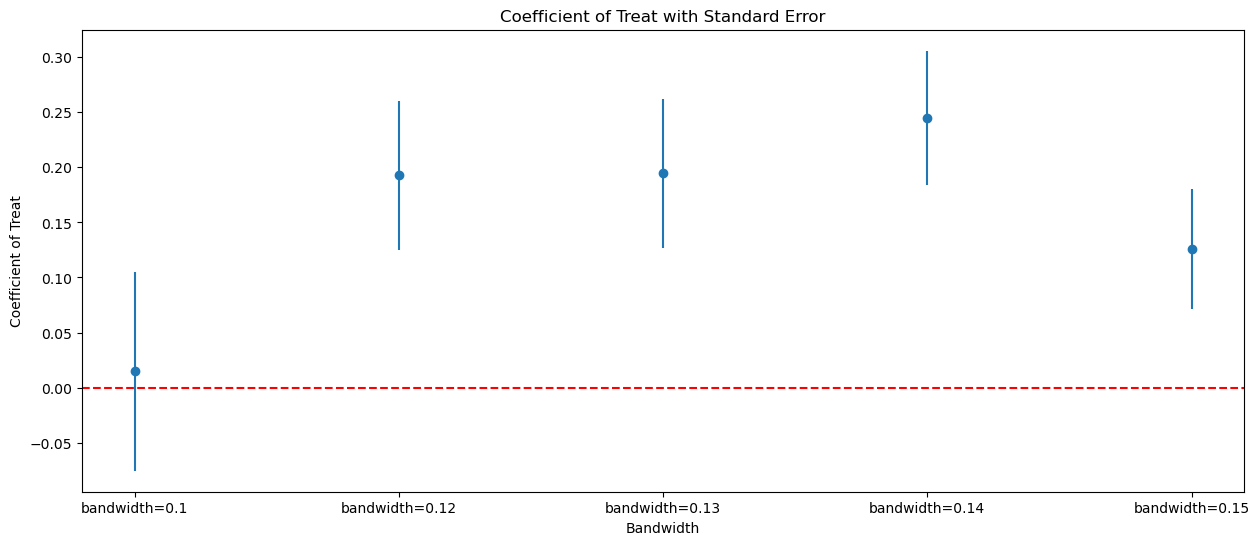

In [347]:
# plot the coefficients of treat with standard error
plt.figure(figsize=(15, 6))
plt.errorbar(x=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], y=[model1.params['treat'], model2.params['treat'], model3.params['treat'], model4.params['treat'], model5.params['treat']], yerr=[model1.bse['treat'], model2.bse['treat'], model3.bse['treat'], model4.bse['treat'], model5.bse['treat']], fmt='o')
plt.title('Coefficient of Treat with Standard Error')
plt.ylabel('Coefficient of Treat')
plt.xlabel('Bandwidth')
# draw a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='--')
q7_fig = plt.gcf()
plt.show()


different cutoff - star 3.5

In [348]:
bw = 0.1
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model1 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [349]:
bw = 0.12
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model2 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [350]:
bw = 0.13
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model3 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [351]:
bw = 0.14
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model4 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [352]:
bw = 0.15
star = 3.5
raw = star - 0.25

# mute the warning
pd.options.mode.chained_assignment = None


rd1 = rd[(rd['raw_rating']>=(raw-bw))&(rd['raw_rating']<=(raw+bw))]
rd1['mrkt_share'] = rd1['avg_enrollment']/rd1['avg_eligibles']
rd1['ln_mrkt_share'] = np.log(rd1['mrkt_share'])
rd1['treat'] = np.where(rd1['raw_rating']>=raw, 1, 0)

# run a regression use formula
import statsmodels.api as sm
import statsmodels.formula.api as smf
model5 = smf.ols('mrkt_share ~ 1 + treat + raw_rating + treat*raw_rating', data=rd1).fit()

In [353]:
# all the models in a table

results_table = summary_col(results=[model1, model2, model3, model4, model5],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], 
                            info_dict=info_dict,
                            regressor_order=['Intercept', 'treat', 'raw_rating', 'treat*raw_rating'])

results_table.add_title('Table 3 - RD Results for star rating 3.5')

# save the table in latex
with open('question7_2.tex', 'w') as f:
    f.write(results_table.as_latex())

print(results_table)

                         Table 3 - RD Results for star rating 3.5
                 bandwidth=0.1 bandwidth=0.12 bandwidth=0.13 bandwidth=0.14 bandwidth=0.15
------------------------------------------------------------------------------------------
Intercept        0.05          0.07           0.04           0.04           -0.01         
                 (0.16)        (0.09)         (0.07)         (0.07)         (0.06)        
treat            -0.07         0.06           0.09           0.10           0.12          
                 (0.23)        (0.11)         (0.10)         (0.10)         (0.07)        
raw_rating       -0.01         -0.02          -0.01          -0.01          0.01          
                 (0.05)        (0.03)         (0.02)         (0.02)         (0.02)        
treat:raw_rating 0.02          -0.02          -0.03          -0.03          -0.04         
                 (0.07)        (0.03)         (0.03)         (0.03)         (0.02)        
R-squared        0.00   

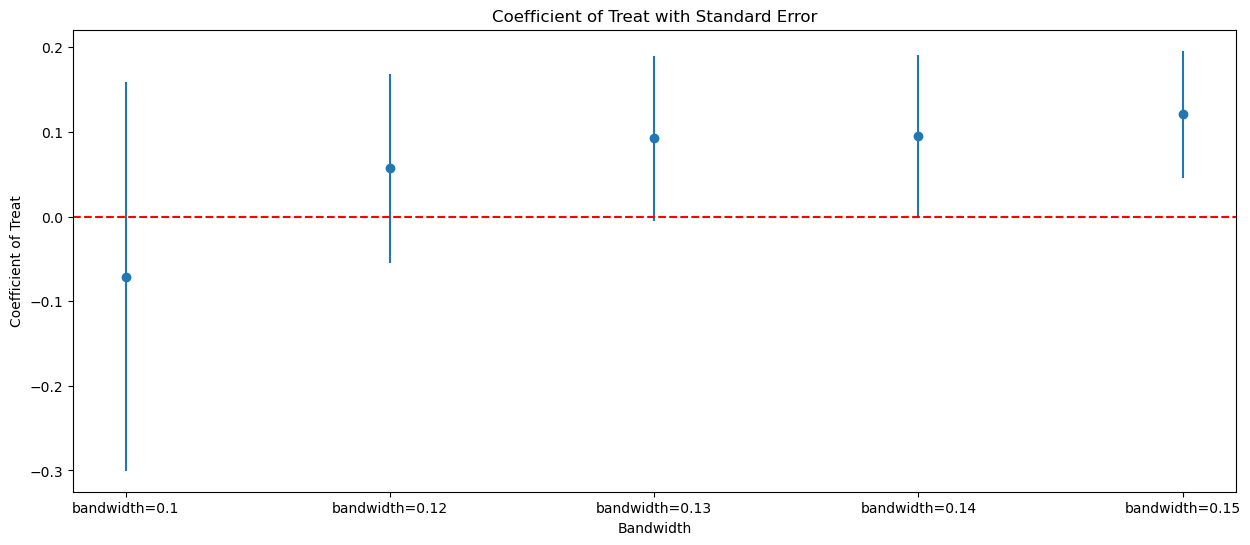

In [354]:
# plot the coefficients of treat with standard error
plt.figure(figsize=(15, 6))

plt.errorbar(x=['bandwidth=0.1', 'bandwidth=0.12', 'bandwidth=0.13', 'bandwidth=0.14', 'bandwidth=0.15'], y=[model1.params['treat'], model2.params['treat'], model3.params['treat'], model4.params['treat'], model5.params['treat']], yerr=[model1.bse['treat'], model2.bse['treat'], model3.bse['treat'], model4.bse['treat'], model5.bse['treat']], fmt='o')
plt.title('Coefficient of Treat with Standard Error')
plt.ylabel('Coefficient of Treat')
plt.xlabel('Bandwidth')
# draw a horizontal line at 0
plt.axhline(y=0, color='r', linestyle='--')
q7_fig_2 = plt.gcf()
plt.show()


Manipulaiton

In [324]:
mani_above_275 = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<2.75)]
mani_below_275 = rd[(rd['raw_rating']<3)&(rd['raw_rating']>=2.75)]

mani_above_325 = rd[(rd['raw_rating']>=3.25)&(rd['raw_rating']<=3.5)]
mani_below_325 = rd[(rd['raw_rating']<3.25)&(rd['raw_rating']>=3)]

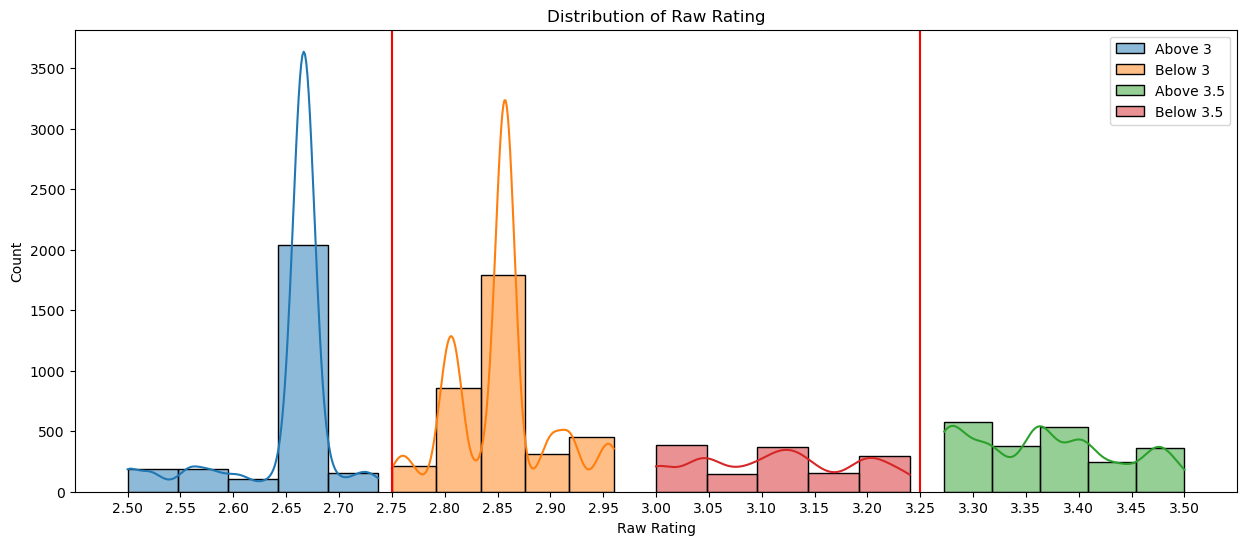

In [355]:
# distribution of raw rating
plt.figure(figsize=(15, 6))
sns.histplot(mani_above_275['raw_rating'], bins=5, label='Above 3', kde=True, stat='count')
sns.histplot(mani_below_275['raw_rating'], bins=5, label='Below 3', kde=True, stat='count')
sns.histplot(mani_above_325['raw_rating'], bins=5, label='Above 3.5', kde=True, stat='count')
sns.histplot(mani_below_325['raw_rating'], bins=5, label='Below 3.5', kde=True, stat='count')
plt.title('Distribution of Raw Rating')
plt.ylabel('Count')
plt.xlabel('Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
plt.legend()
q8_fig = plt.gcf()
plt.show()


characteristics

In [252]:
rd['plan_type'].unique()

array(['Local PPO', 'HMO/HMOPOS', 'PFFS', '1876 Cost',
       'PSO (State License)', 'Regional PPO'], dtype=object)

In [255]:
rd['PartD'] = np.where(rd['partd']=='Yes', 1, 0)
rd['HMO'] = np.where(rd['plan_type']=='HMO/HMOPOS', 1, 0)

In [256]:
mani_above_275 = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=2.75)]

mani_below_275 = rd[(rd['raw_rating']<=3)&(rd['raw_rating']>=2.75)]

mani_above_325 = rd[(rd['raw_rating']>=3.25)&(rd['raw_rating']<=3.5)]
mani_below_325 = rd[(rd['raw_rating']<=3.25)&(rd['raw_rating']>=3)]

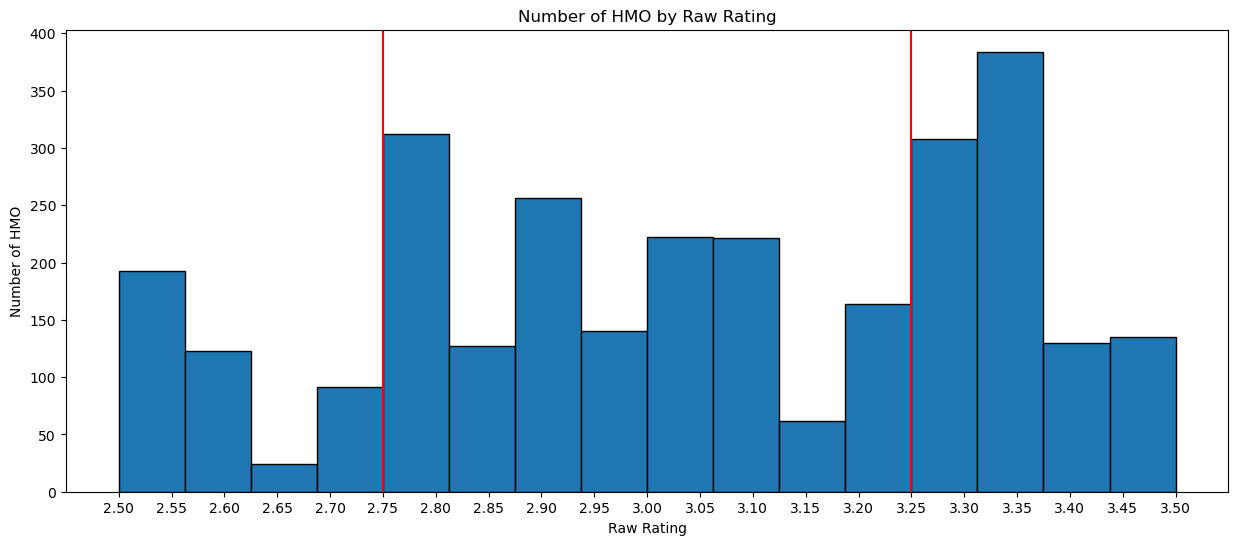

In [356]:
import numpy as np
import matplotlib.pyplot as plt

target = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=3.5)]
# Group continuous scale into bins
bins = np.linspace(min(target['raw_rating']), max(target['raw_rating']), 17)

# Calculate proportion of binary variable for each bin
proportions = []
for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    mask = (target['raw_rating'] >= bin_start) & (target['raw_rating'] < bin_end)
    proportion = np.sum(target[mask]['HMO'])
    proportions.append(proportion)

# Plot histogram with proportions
plt.figure(figsize=(15, 6))
plt.bar(bins[:-1], proportions, width=bins[1]-bins[0], align='edge', edgecolor='black')
plt.xlabel('Raw Rating')
plt.ylabel('Number of HMO')
plt.title('Number of HMO by Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
q9_fig_1 = plt.gcf()
plt.show()



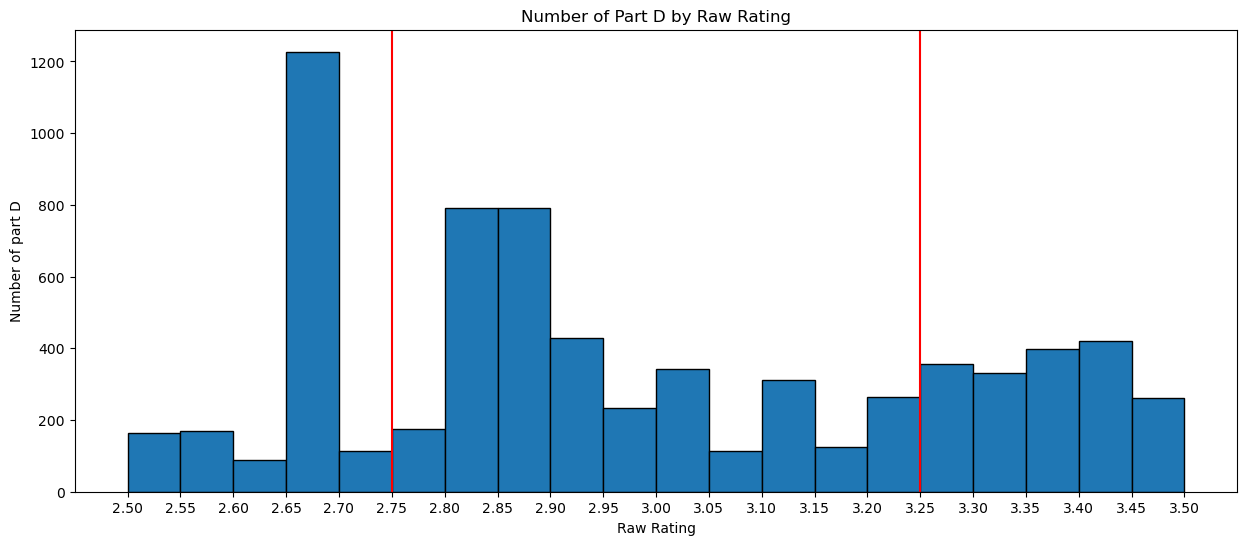

In [357]:
import numpy as np
import matplotlib.pyplot as plt

target = rd[(rd['raw_rating']>=2.5)&(rd['raw_rating']<=3.5)]
# Group continuous scale into bins
bins = np.linspace(min(target['raw_rating']), max(target['raw_rating']), 21)

# Calculate proportion of binary variable for each bin
proportions = []
for i in range(len(bins) - 1):
    bin_start = bins[i]
    bin_end = bins[i + 1]
    mask = (target['raw_rating'] >= bin_start) & (target['raw_rating'] < bin_end)
    proportion = np.sum(target[mask]['PartD'])
    proportions.append(proportion)

# Plot histogram with proportions
plt.figure(figsize=(15, 6))
plt.bar(bins[:-1], proportions, width=bins[1]-bins[0], align='edge', edgecolor='black')
plt.xlabel('Raw Rating')
plt.ylabel('Number of part D')
plt.title('Number of Part D by Raw Rating')
plt.xticks(np.arange(2.5, 3.51, 0.05))
# draw two vertical line at 2.75 and 3.25
plt.axvline(x=2.75, color='red')
plt.axvline(x=3.25, color='red')
q9_fig_2 = plt.gcf()
plt.show()



In [358]:
import pickle

with open('hwk4_Q1-9.pkl', 'wb') as f:
    pickle.dump((q1_fig, q2_fig, q3_rate_fig, q3_payment_fig, q4_fig, q5_fig, q5_table, q7_fig, q7_fig_2, q8_fig, q9_fig_1, q9_fig_2), f)
